In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install librosa numpy pandas matplotlib IPython fastprogress

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "./" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['bird-songs-generate-spectrograms.ipynb', '.DS_Store', 'README.md', 'proposal.pdf', '.gitignore', 'spectrograms', 'proposal.md', '.git', 'data']


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import matplotlib.pyplot as plt

In [9]:
data_dir = Path('./')
wav_dir = data_dir/'data/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV'
spect_dir = Path('./spectrograms')
spect_dir.mkdir(parents=True, exist_ok=True)

In [10]:
import librosa
import librosa.display

def create_spectrogram(fn_audio, fn_gram, zoom=1):
    clip, sample_rate = librosa.load(fn_audio, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    fig = plt.figure(figsize=tuple(reversed(S.shape)), dpi=1)
    plt.gca().set_axis_off()
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    fig.savefig(fn_gram, dpi=zoom, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

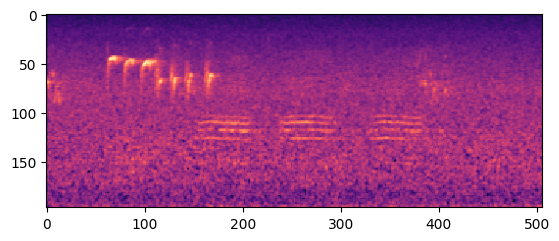

In [11]:
from IPython.display import Image, Audio, display

create_spectrogram(wav_dir/'train/nips4b_birds_trainfile015.wav', '/tmp/015.png', 2)
plt.imshow(plt.imread('/tmp/015.png'))
plt.show()
display(Audio(str(wav_dir/'train/nips4b_birds_trainfile015.wav')))

In [12]:
from fastprogress import progress_bar

def audios_to_spectrograms(from_path, to_path, folder="", from_suffix=".wav", to_suffix=".png", zoom=1):
    (to_path/folder).mkdir(parents=True, exist_ok=True)
    fns = list((from_path/folder).glob('*' + from_suffix))
    pb = progress_bar(range(len(fns)))
    for i, src in zip(pb, fns):
        dest = to_path/folder/(src.stem + to_suffix)
        create_spectrogram(src, dest, zoom)
        pb.comment = src.stem

In [13]:
for ds in ('train', 'test'):
    audios_to_spectrograms(wav_dir, spect_dir, ds, zoom=2)

nips4b_birds_trainfile197


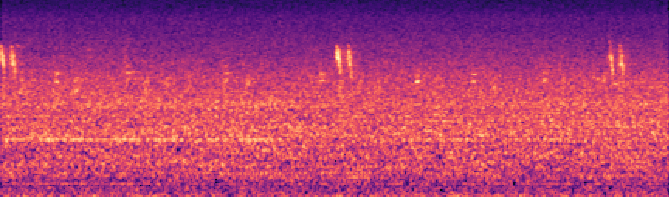

nips4b_birds_trainfile313


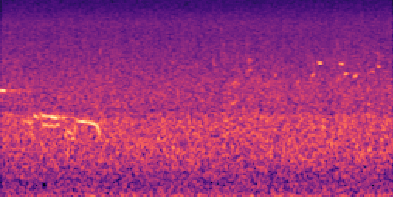

nips4b_birds_trainfile356


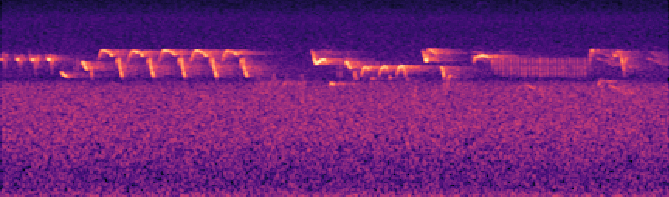

nips4b_birds_testfile0017


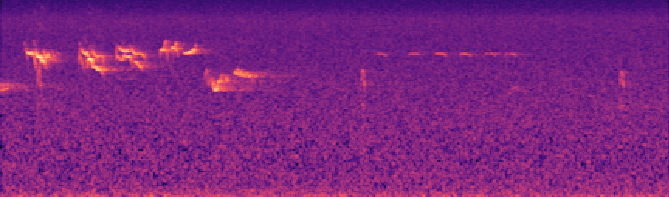

nips4b_birds_testfile0790


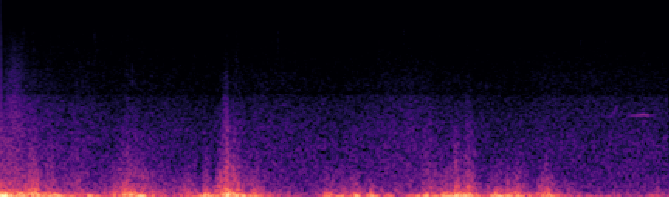

nips4b_birds_testfile0914


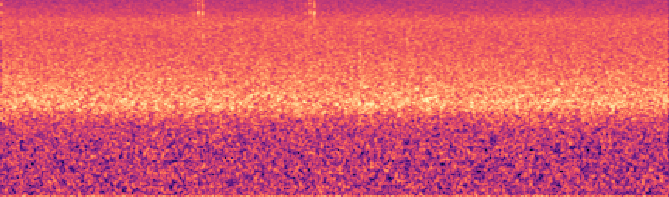

In [14]:
import random

for ds in ('train', 'test'):
    for fn in random.choices(list((spect_dir/ds).glob('*.png')), k=3):
        print(fn.stem)
        display(Image(str(fn)))
        display(Audio(str(wav_dir/ds/(fn.stem + '.wav'))))

In [15]:
! tar cjf spectrograms.tar.bz2 $spect_dir
! rm -r $spect_dir